
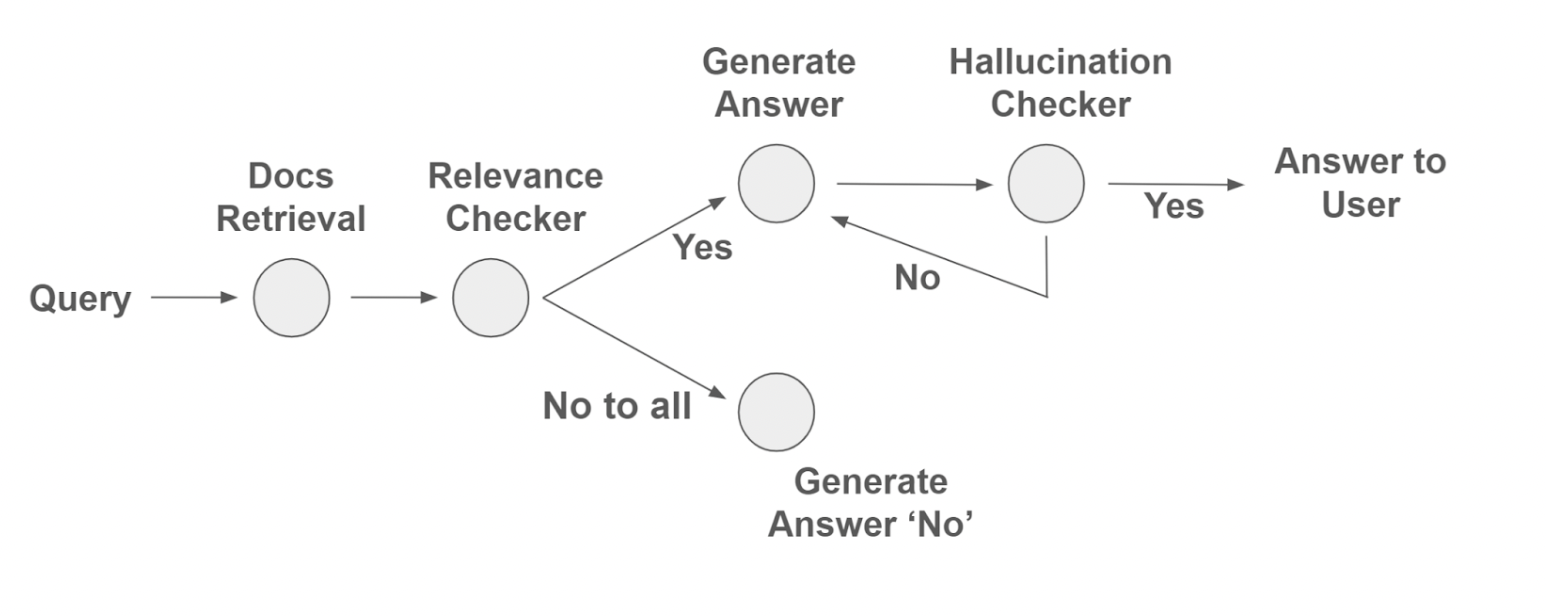

* 위의 이미지 대로 Chain 을 설계해보고자 한다
* 절차는 미션별로 텍스트로 정리되어 있다

# 3개의 블로그 포스팅 본문을 Load 한다

* Langchian webbaseLoader 를 활용한다
* url links

>    https://lilianweng.github.io/posts/2023-06-23-agent/

>    https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/

>    https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/

In [1]:
!pip install -q --upgrade langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 3.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
from langchain_community.document_loaders import WebBaseLoader


agent_docs_loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
prompt_docs_loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/")
adv_docs_loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/")

In [12]:
agent_content = agent_docs_loader.load()
prompt_conent = prompt_docs_loader.load()
adv_conent = adv_docs_loader.load()

In [15]:
agent_content[0].page_content
prompt_conent[0].page_content
adv_conent[0].page_content

'\n\n\n\n\n\nAdversarial Attacks on LLMs | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      Adversarial Attacks on LLMs\n    \nDate: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasics\n\nThreat Model\n\nClassification\n\nText Generation\n\nWhite-box vs Black-box\n\n\n\nTypes of Adversarial Attacks\n\nToken Manipulation\n\nGradient based Attacks\n\nJailbreak Prompting\n\nHumans in the Loop Red-teaming\n\nModel Red-teaming\n\n\nPeek into Mitigation\n\nSaddle Point Problem\n\nSome work on LLM Robustness\n\n\nCitation\n\nReferences\n\n\n\n\n\nThe use of large language models in the real world has strongly accelerated by the launch of ChatGPT. We (including my team at OpenAI, shoutout to them) have invested a lot of e

In [16]:
def write_to_file(file_path, content):
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(content)

In [17]:
write_to_file("/content/drive/MyDrive/Colab Notebooks/agent.txt", agent_content[0].page_content)
write_to_file("/content/drive/MyDrive/Colab Notebooks/prompt_engineering.txt", prompt_conent[0].page_content)
write_to_file("/content/drive/MyDrive/Colab Notebooks/adv_attack.txt", adv_conent[0].page_content)

# Recursive text splitter 를 활용하여 `불러온 본문`을 Split(Chunking) 한다

> https://python.langchain.com/v0.2/docs/how_to/recursive_text_splitter/ 를 참고한다

In [18]:
!pip install -qU langchain-text-splitters

In [20]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

def find_loaded_docs(path) -> str:
  with open(path) as f:
    return f.read()

In [21]:
agent_docs = find_loaded_docs("/content/drive/MyDrive/Colab Notebooks/agent.txt")
prompt_docs = find_loaded_docs("/content/drive/MyDrive/Colab Notebooks/prompt_engineering.txt")
adv_docs = find_loaded_docs("/content/drive/MyDrive/Colab Notebooks/adv_attack.txt")

In [22]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=256,
    chunk_overlap=1,
    length_function=len,
    is_separator_regex=False,
)

In [24]:
agent_text = text_splitter.create_documents([agent_docs])
print(agent_text[0])
print(agent_text[1])

page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app"
page_content='LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory'


In [25]:
prompt_text = text_splitter.create_documents([prompt_docs])
print(prompt_text[0])
print(prompt_text[1])

page_content="Prompt Engineering | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app"
page_content='Prompt Engineering\n    \nDate: March 15, 2023  |  Estimated Reading Time: 21 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasic Prompting\n\nZero-Shot\n\nFew-shot\n\nTips for Example Selection\n\nTips for Example Ordering\n\n\n\nInstruction Prompting'


In [26]:
adv_text = text_splitter.create_documents([adv_docs])
print(adv_text[0])
print(adv_text[1])

page_content="Adversarial Attacks on LLMs | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app"
page_content='Adversarial Attacks on LLMs\n    \nDate: October 25, 2023  |  Estimated Reading Time: 33 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nBasics\n\nThreat Model\n\nClassification\n\nText Generation\n\nWhite-box vs Black-box'


# Chunks 를 임베딩하여 Vector Store 저장한다

* openai, chroma 를 사용하자
* [embedding](https://python.langchain.com/v0.2/docs/integrations/text_embedding/openai/)
* [vector store](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)

In [27]:
!pip install langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00


In [28]:
import os

# Set the API key
os.environ['OPENAI_API_KEY'] = "sk-"

In [29]:
from langchain_openai import OpenAIEmbeddings
import math


## Similiarity
def cosine_similarity(vec1, vec2):
    # Step 1: Compute the dot product
    dot_product = sum(a * b for a, b in zip(vec1, vec2))

    # Step 2: Compute the magnitudes of the vectors
    magnitude_vec1 = math.sqrt(sum(a * a for a in vec1))
    magnitude_vec2 = math.sqrt(sum(b * b for b in vec2))

    # Step 3: Compute the cosine similarity
    if magnitude_vec1 == 0 or magnitude_vec2 == 0:
        # To avoid division by zero
        return 0.0
    return dot_product / (magnitude_vec1 * magnitude_vec2)

## openAI
embeddings_model = OpenAIEmbeddings()

In [30]:
!pip install langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42

# User query = ‘agent memory’ 를 받아 관련된 chunks를 retrieve 를 구현해보자

* [관련 api docs](https://api.python.langchain.com/en/latest/vectorstores/langchain_core.vectorstores.VectorStore.html#langchain_core.vectorstores.VectorStore.as_retriever)


# User query와 retrieved chunk 에 대해 relevance 가 있는지를 평가하는 시스템 프롬프트 작성

* quality 에 대해서 llm 이 스스로 평가하도록 하고, 관련이 있으면 `{‘relevance’: ‘yes’}`, 없으면 `{‘relevance’: ‘no’}` 을 출력해보자
* `JsonOutputParser()` 를 활용한다
* prompt 는 `llama3 prompt format` 을 준수한다

[(링크)](https://python.langchain.com/v0.2/docs/how_to/output_parser_json/#without-pydantic)

# 바로 위 미션에서 'no' 를 입력받으면 디버깅 (Splitter, Chunk size, Overlap, embedding model, vector store, retriever 평가 시스템에 대해서 디버깅을 진행한다

# 위 미션에서 'yes' 응답을 받으면 명확히 관련 없는 docs 나 질문을 해서 원하는 대로 동작하는지 확인한다

* 예를 들면, do you like an apple? 같은 질문이 나오면 'no' 가 나와야 한다
* 테스트 프롬프트 및 평가 코드 작성을 한다
* `llama3 prompt format` 을 준수한다

# `yes` 응답이고 평가에서도 문제가 없다면 `Retrived chunk` 를 가지고 답변을 작성하자

* chain 은 `prompt | llm | parser` 형태로 구성한다

# 생성된 답안에 Hallucination 이 있는지 평가하는 시스템 프롬프트를 작성한다

* LLM 이 스스로 평가하도록 하고, Hallucination 이 있으면 `{‘hallucination’: ‘yes’}`, 없으면 `{‘hallucination’: ‘no’}` 를 진행한다

* `llama3 prompt format` 을 준수한다

# 마지막 작업을 성공시키면 출력, 실패하면 Retrieved chunk 를 가지고 답변을 다시 수행한다